In [1]:
import keras
from keras.layers import Activation, Dense, Input
from keras.layers import Conv2D, Flatten
from keras.layers import Reshape, Conv2DTranspose, UpSampling2D
from keras.datasets import mnist
from keras.models import Sequential , load_model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_train,_) , (x_test , _) = mnist.load_data()

In [3]:
image_size = x_train.shape[1]
x_test = np.reshape(x_test, [-1, image_size, image_size, 1])
x_test = x_test.astype('float32') / 255

In [4]:
noise = np.random.normal(loc=0, scale=1, size=x_test.shape)
x_test_noisy = x_test + noise

In [5]:
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [6]:
import h5py

In [7]:
model = load_model('denoising-autenc.h5')

In [8]:
x_test_noisy.shape

(10000, 28, 28, 1)

In [9]:
cleaned_image = model.predict(x_test_noisy)

In [10]:
cleaned_image = np.reshape(cleaned_image, [-1, image_size, image_size]) #Resizing to plot

In [11]:
x_test = np.reshape(x_test, [-1, image_size, image_size #Resizing to plot

In [12]:
x_test_noisy = np.reshape(x_test_noisy, [-1, image_size, image_size]) #Resizing to plot

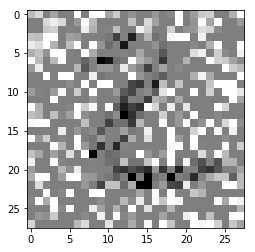

In [13]:
noise_plot = x_test_noisy[1,:,:] - x_test[1,:,:]
plt.imshow(noise_plot , cmap = 'gray')a
#ADDED NOISE

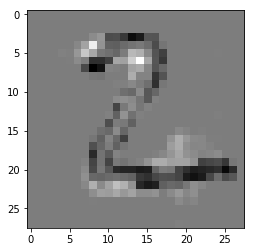

In [14]:
noise_plot = cleaned_image[1,:,:] - x_test[1,:,:]
plt.imshow(noise_plot , cmap = 'gray')
#DIFFERENCE BETWEEN CLEANED IMAGE and ORIGINAL